In [10]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from sklearn.metrics import accuracy_score 
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [5]:
import librosa
import pandas as pd
import os

n_mfcc = 40;
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, sr = 22050)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    mfccs_mean = pd.DataFrame(mfccs.mean(axis=1)).transpose()
    return mfccs_mean


def create_dataframe(directory):
    data = []
    labels = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = subdir + os.path.sep + file
            if file_path.endswith(".mp3"):
                features = extract_features(file_path)
                label = file.split(".")[0]
                data.append(features)
                labels.append(label)
    data_df = pd.concat(data, ignore_index=True)
    data_df['label'] = labels
    return data_df


directory = '/content/sample_data/my_audio'
data_df = create_dataframe(directory)

data_df.to_csv('audio_vectors.csv', index=False)

In [8]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,-310.653198,114.006577,-8.949816,32.298817,23.754930,0.476295,-6.923643,11.022780,0.432234,9.976504,...,-1.674310,-2.337792,1.075846,-3.834865,0.333780,-3.112932,0.745917,-0.993104,0.123977,Sad
1,-267.643372,144.928879,14.492287,2.945261,10.753216,3.069179,-11.228010,-2.941697,-6.079162,0.348318,...,-0.334749,-4.377837,-2.721997,-4.408399,-1.734178,-5.442444,-0.920213,-0.754218,-0.292263,Sad
2,-234.778015,124.474327,11.977366,21.836491,8.753133,8.812948,-1.710792,1.345945,-8.430063,7.340374,...,-1.227019,0.865148,-0.724218,1.696935,3.195447,3.017133,2.200485,-1.790992,-1.251128,Sad
3,-49.295231,126.478638,-19.573408,34.769978,-5.357277,11.110708,-5.309941,3.107733,-7.430996,-2.737630,...,0.905169,-0.881575,-0.870587,-1.651855,0.677101,-1.868641,-0.485206,-3.445559,-0.567956,Angry
4,-162.936539,103.940735,10.802122,17.139130,9.731444,-15.042475,-11.973261,4.185050,-16.637585,-0.250949,...,-0.176791,-1.515979,4.082965,0.888164,2.337931,-1.851812,-0.226859,-1.828536,-1.575242,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,-72.638695,112.775688,-8.857608,19.901653,-1.954535,8.039962,-4.520589,5.200881,-8.515905,5.033236,...,1.607350,-0.375451,1.305141,-3.387121,0.278339,-3.015135,1.423900,-2.943631,1.129789,Angry
239,-153.976440,155.608414,-10.307290,29.232224,11.489508,-4.495124,12.960011,1.179408,-8.143290,6.732738,...,1.575045,-3.600849,-3.099839,-0.748923,0.332382,-2.993572,-0.597006,-1.503161,0.945662,Sad
240,-212.141861,117.533676,23.178322,29.083248,7.024023,5.158135,0.096772,4.927989,-2.399021,3.904829,...,1.163921,-0.608176,2.844276,-0.109941,0.054689,-2.251081,-0.691613,-5.506441,-2.507502,Sad
241,-200.818863,128.969162,-17.038839,33.835728,1.757049,6.557553,0.732583,4.332813,-3.552686,1.173273,...,0.418746,-4.747782,-1.278381,0.070128,-0.109303,-2.755774,-2.004298,-1.893307,0.554434,Angry


In [13]:
data_df['label'] = data_df['label'].astype(str)

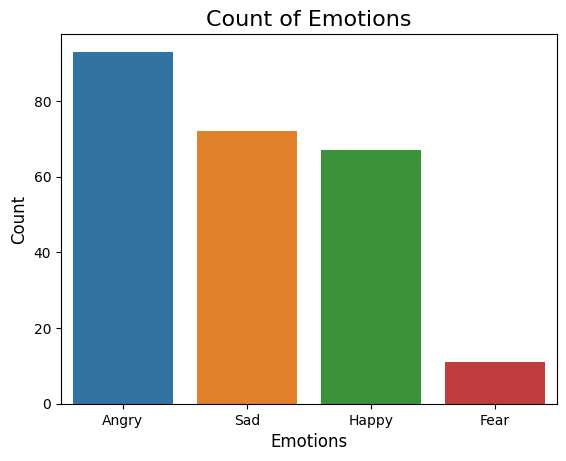

In [15]:
emotion_counts = data_df['label'].value_counts()
sns.barplot(x=emotion_counts.index, y=emotion_counts)
plt.title('Count of Emotions', size=16)
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)
plt.show()

In [16]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()


def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()


In [17]:
emotion='Angry'
path = np.array(data_df.Path[data_df.Label==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

AttributeError: ignored

In [27]:
XX = data_df.drop('label', axis=1)
data_df['label'] = data_df['label'].replace({'Angry': 0, 'Sad': 1, 'Happy': 2,'Fear': 3})
YY = data_df['label']
x = XX.values
y = YY.values

encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((145, 40), (145, 4), (49, 40), (49, 4))

In [44]:
from keras.callbacks import ReduceLROnPlateau

In [49]:
# Define the model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(40,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3,strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_56 (Conv1D)          (None, 38, 32)            128       
                                                                 
 max_pooling1d_41 (MaxPoolin  (None, 19, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_57 (Conv1D)          (None, 17, 64)            6208      
                                                                 
 max_pooling1d_42 (MaxPoolin  (None, 8, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_58 (Conv1D)          (None, 6, 128)            24704     
                                                                 
 max_pooling1d_43 (MaxPoolin  (None, 3, 128)         

In [50]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
3/3 [==============================] - 3s 133ms/step - loss: 1.3577 - accuracy: 0.3793 - val_loss: 1.2944 - val_accuracy: 0.3061 - lr: 0.0010
Epoch 2/50
3/3 [==============================] - 0s 25ms/step - loss: 1.2381 - accuracy: 0.4690 - val_loss: 1.2304 - val_accuracy: 0.3265 - lr: 0.0010
Epoch 3/50
3/3 [==============================] - 0s 25ms/step - loss: 1.2046 - accuracy: 0.4759 - val_loss: 1.2285 - val_accuracy: 0.3061 - lr: 0.0010
Epoch 4/50
3/3 [==============================] - 0s 25ms/step - loss: 1.1972 - accuracy: 0.4966 - val_loss: 1.2601 - val_accuracy: 0.3061 - lr: 0.0010
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 1.1722 - accuracy: 0.5310 - val_loss: 1.2441 - val_accuracy: 0.3878 - lr: 0.0010
Epoch 6/50
3/3 [==============================] - 0s 26ms/step - loss: 1.1132 - accuracy: 0.5310 - val_loss: 1.2094 - val_accuracy: 0.3878 - lr: 0.0010
Epoch 7/50
3/3 [==============================] - 0s 24ms/step - loss: 1.0685 - accurac

In [51]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

2/2 [==============================] - 0s 9ms/step - loss: 1.4479 - accuracy: 0.5510
Accuracy of our model on test data :  55.10203838348389 %


In [57]:


# Define the model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(40,1)))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(128, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(256, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_65 (Conv1D)          (None, 38, 64)            256       
                                                                 
 max_pooling1d_50 (MaxPoolin  (None, 19, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_66 (Conv1D)          (None, 17, 128)           24704     
                                                                 
 max_pooling1d_51 (MaxPoolin  (None, 8, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_67 (Conv1D)          (None, 6, 256)            98560     
                                                                 
 max_pooling1d_52 (MaxPoolin  (None, 3, 256)         

In [58]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
3/3 [==============================] - 2s 136ms/step - loss: 1.3281 - accuracy: 0.3862 - val_loss: 1.2438 - val_accuracy: 0.3061 - lr: 0.0010
Epoch 2/50
3/3 [==============================] - 0s 34ms/step - loss: 1.2223 - accuracy: 0.4276 - val_loss: 1.1950 - val_accuracy: 0.4898 - lr: 0.0010
Epoch 3/50
3/3 [==============================] - 0s 37ms/step - loss: 1.1718 - accuracy: 0.5724 - val_loss: 1.2164 - val_accuracy: 0.3469 - lr: 0.0010
Epoch 4/50
3/3 [==============================] - 0s 35ms/step - loss: 1.1476 - accuracy: 0.5172 - val_loss: 1.2425 - val_accuracy: 0.3469 - lr: 0.0010
Epoch 5/50
3/3 [==============================] - 0s 36ms/step - loss: 1.0825 - accuracy: 0.5379 - val_loss: 1.2198 - val_accuracy: 0.4490 - lr: 0.0010
Epoch 6/50
3/3 [==============================] - 0s 40ms/step - loss: 1.0803 - accuracy: 0.5586 - val_loss: 1.2242 - val_accuracy: 0.4286 - lr: 0.0010
Epoch 7/50
3/3 [==============================] - 0s 37ms/step - loss: 1.0146 - accurac

In [61]:
average_accuracy = np.mean(history.history['accuracy'])
print('Average Accuracy:', average_accuracy)

Average Accuracy: 0.8554482728242874


In [62]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

2/2 [==============================] - 0s 24ms/step - loss: 1.9256 - accuracy: 0.5714
Accuracy of our model on test data :  57.14285969734192 %
